## AGUME KENNETH B30309 S24B38/017

In [170]:
import pandas as pd 

- Loading the dataset

In [171]:
data = pd.read_csv("assign.csv")
data

,"Timestamp,Energy_kWh"
0,"2025-01-01 00:00:00,4.2"
1,"2025-01-01 00:15:00,3.8"
2,"01-01-2025 00:30:00,3.9"
3,"2025-01-01 00:45:00,"
4,"2025-01-01 01:00:00,4.5"
5,"2025-01-01 01:30:00,4.1"
6,"2025-01-01 01:45:00,3.7"
7,"2025-01-01 02:00:00,NaN"
8,"2025-01-01 02:15:00,3.2"
9,"2025-01-01 02:30:00,3.1"


In [ ]:
# splittinng the data so that the two columns appear separately
data[['Timestamp', 'Energy_kWh']] = data.iloc[:,0].str.split(',', expand=True)

# Remove extra spaces from Timestamp
data['Timestamp'] = data['Timestamp'].astype(str).str.strip()


In [173]:
# Dropping the old combined column
data = data.drop(columns=data.columns[0])
data

,Timestamp,Energy_kWh
0,2025-01-01 00:00:00,4.2
1,2025-01-01 00:15:00,3.8
2,01-01-2025 00:30:00,3.9
3,2025-01-01 00:45:00,
4,2025-01-01 01:00:00,4.5
5,2025-01-01 01:30:00,4.1
6,2025-01-01 01:45:00,3.7
7,2025-01-01 02:00:00,NaN
8,2025-01-01 02:15:00,3.2
9,2025-01-01 02:30:00,3.1


- Converting Timestap column to datetime

In [174]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
data

,Timestamp,Energy_kWh
0,2025-01-01 00:00:00,4.2
1,2025-01-01 00:15:00,3.8
2,NaT,3.9
3,2025-01-01 00:45:00,
4,2025-01-01 01:00:00,4.5
5,2025-01-01 01:30:00,4.1
6,2025-01-01 01:45:00,3.7
7,2025-01-01 02:00:00,NaN
8,2025-01-01 02:15:00,3.2
9,2025-01-01 02:30:00,3.1


In [175]:
data['Timestamp'].isna().sum()

2

## Handling the gaps

In [176]:
# Setting Timestamp as the time index
data = data.set_index('Timestamp')
data

,Energy_kWh
Timestamp,
2025-01-01 00:00:00,4.2
2025-01-01 00:15:00,3.8
NaT,3.9
2025-01-01 00:45:00,
2025-01-01 01:00:00,4.5
2025-01-01 01:30:00,4.1
2025-01-01 01:45:00,3.7
2025-01-01 02:00:00,NaN
2025-01-01 02:15:00,3.2


- Creating a continous  15-minute time range 

In [177]:
full_time = pd.date_range(
    start=data.index.min(),
    end=data.index.max(),
    freq='15min'
)

In [178]:
# Convert Energy_kWh to numeric
data['Energy_kWh'] = pd.to_numeric(data['Energy_kWh'], errors='coerce')

In [179]:
# Handle duplicate timestamps by taking the mean
data = data.groupby(data.index).mean()
data

,Energy_kWh
Timestamp,
2025-01-01 00:00:00,4.2
2025-01-01 00:15:00,3.8
2025-01-01 00:45:00,NaN
2025-01-01 01:00:00,4.5
2025-01-01 01:30:00,4.1
2025-01-01 01:45:00,3.7
2025-01-01 02:00:00,NaN
2025-01-01 02:15:00,3.2
2025-01-01 02:30:00,3.1


In [180]:
# Reindexing the data to include missing time intervals
data = data.reindex(full_time)
data

,Energy_kWh
2025-01-01 00:00:00,4.2
2025-01-01 00:15:00,3.8
2025-01-01 00:30:00,NaN
2025-01-01 00:45:00,NaN
2025-01-01 01:00:00,4.5
...,...
2025-01-04 07:45:00,NaN
2025-01-04 08:00:00,7.1
2025-01-04 08:15:00,7.5
2025-01-04 08:30:00,NaN


# Handling the missing values

In [181]:
# Fill missing Energy values using linear interpolation
data['Energy_kWh'] = data['Energy_kWh'].interpolate(method='linear')
data

,Energy_kWh
2025-01-01 00:00:00,4.200000
2025-01-01 00:15:00,3.800000
2025-01-01 00:30:00,4.033333
2025-01-01 00:45:00,4.266667
2025-01-01 01:00:00,4.500000
...,...
2025-01-04 07:45:00,7.085714
2025-01-04 08:00:00,7.100000
2025-01-04 08:15:00,7.500000
2025-01-04 08:30:00,7.850000


In [182]:
# Check remaining missing values
data.isna().sum()

Energy_kWh    0
dtype: int64

- Missing energy consumption values created during reindexing have been estimated using linear interpolation to maintain continuity in the time series.

# Feature engineering 

In [191]:
daily_energy = data.resample('D').mean()
daily_energy

,Energy_kWh,Hour,Day_of_Week
2025-01-01,3.427111,11.5,2.0
2025-01-02,4.399561,11.5,3.0
2025-01-03,5.749295,11.5,4.0
2025-01-04,6.952976,4.0,5.0


In [192]:
# Computing 7-day rolling average (min_periods=1 ensures line starts from day 1)
daily_energy['7d_Rolling'] = daily_energy['Energy_kWh'].rolling(window=7, min_periods=1).mean()

In [193]:
# Adding a day of the Week (Monday=0, Sunday=6)
daily_energy['Day_of_Week'] = daily_energy.index.dayofweek

# Adding Is_Weekend column (True if Saturday or Sunday)
daily_energy['Is_Weekend'] = daily_energy['Day_of_Week'] >= 5

# checking for the first few rows
print(daily_energy.head())

            Energy_kWh  Hour  Day_of_Week  7d_Rolling  Is_Weekend
2025-01-01    3.427111  11.5            2    3.427111       False
2025-01-02    4.399561  11.5            3    3.913336       False
2025-01-03    5.749295  11.5            4    4.525322       False
2025-01-04    6.952976   4.0            5    5.132236        True


- Seasonal View of Daily Energy with 7 day Rolling Average

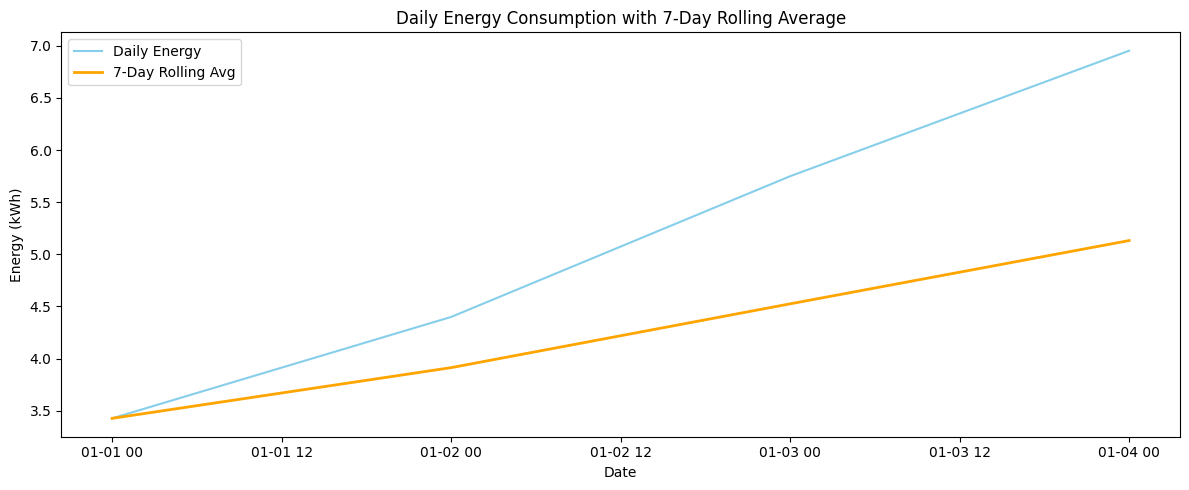

In [194]:
import matplotlib.pyplot as plt

# Computing the 7 day rolling average
plt.figure(figsize=(12,5))
plt.plot(daily_energy.index, daily_energy['Energy_kWh'], label='Daily Energy', color='skyblue')
plt.plot(daily_energy.index, daily_energy['7d_Rolling'], label='7-Day Rolling Avg', color='orange', linewidth=2)
plt.title('Daily Energy Consumption with 7-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Energy (kWh)')
plt.legend()
plt.tight_layout()
plt.show()


- The blue line shows the actual daily energy consumption in kWh.
- The orange line is the 7-day rolling average, which smooths out day-to-day fluctuations and shows the weekly trend more clearly.
- By comparing the two lines, we can easily identify patterns, such as higher energy use on certain weekdays and lower use on weekends

- From the plot, we can see that energy consumption tends to peak towards the end of the workweek and drop slightly during weekends.

- Behavioral View(Heatmap of Hour vs. Day of Week)

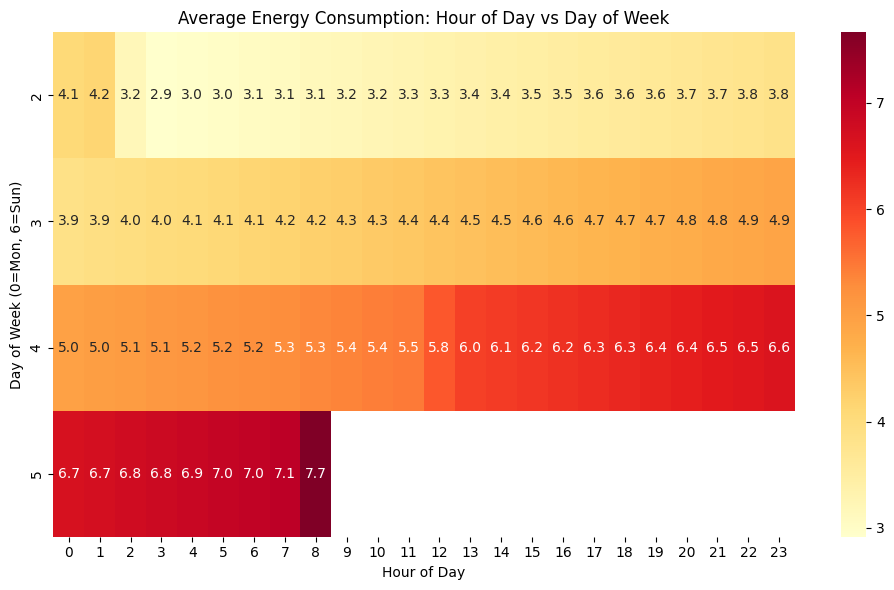

In [195]:
import seaborn as sns

# Extracting hours from original data
data['Hour'] = data.index.hour
data['Day_of_Week'] = data.index.dayofweek

# Aggregating the mean energy by Hour and Day of Week
hourly_behavior = data.groupby(['Day_of_Week','Hour'])['Energy_kWh'].mean().unstack()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(hourly_behavior, cmap='YlOrRd', annot=True, fmt=".1f")
plt.title('Average Energy Consumption: Hour of Day vs Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0=Mon, 6=Sun)')
plt.tight_layout()
plt.show()


- The heatmap shows the average energy consumption for each hour of the day (0–23) across the days of the week (Monday = 0, Sunday = 6). Each cell represents the mean consumption at a specific hour on a specific day, with darker colors indicating higher usage.

- Energy consumption peaks are typically observed on Sunday, especially during 6:30 to 8:30. Weekends tend to show higher usage. This aligns with expected residential or commercial activity patterns.

# Saving the cleaned csv file 

In [196]:
# Export the cleaned daily_energy dataframe
daily_energy.to_csv('Assignment1_Cleaned.csv', index=True)

In [200]:
# Function to convert notebook to PDF with HTML fallback
from pathlib import Path
import nbformat
from nbconvert import PDFExporter, HTMLExporter

def convert_to_pdf(notebook_path='Assignment_one.ipynb', out_pdf='Assignment_one.pdf'):
    notebook_path = Path(notebook_path)
    if not notebook_path.exists():
        raise FileNotFoundError(f"{notebook_path} not found")

    nb = globals().get('nb') or nbformat.read(str(notebook_path), as_version=4)
    pdf_exporter = globals().get('pdf_exporter') or PDFExporter()

    try:
        body, resources = pdf_exporter.from_notebook_node(nb)
        if isinstance(body, str):
            body = body.encode('utf-8')
        Path(out_pdf).write_bytes(body)
        print(f"Conversion complete: {out_pdf}")
    except Exception as e:
        html_exporter = globals().get('html_exporter') or HTMLExporter()
        body, resources = html_exporter.from_notebook_node(nb)
        html_path = Path(out_pdf).with_suffix('.html')
        html_path.write_text(body, encoding='utf-8')
        print(f"PDF export failed ({e}). Saved HTML fallback: {html_path}")

# call the function 
convert_to_pdf()


PDF export failed (Pandoc wasn't found.
Please check that pandoc is installed:
https://pandoc.org/installing.html). Saved HTML fallback: Assignment_one.html
